<p align = center> Traffic Sign Detection using CNN & Data Augmentation </p>
<p align = center>
Data set: German Traffic Signs
</p>
<p align = center>
Data set link: https://bitbucket.org/jadslim/german-traffic-signs
</p>

In [1]:
!git clone "https://github.com/mrunmayee17/Traffic_Sign_Detection_CNN_Data_Augmentation.git"

Cloning into 'Traffic_Sign_Detection_CNN_Data_Augmentation'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 23 (delta 6), reused 20 (delta 3), pack-reused 0
Receiving objects: 100% (23/23), 1.38 MiB | 12.63 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [2]:
import os
os.chdir("/content/Traffic_Sign_Detection_CNN_Data_Augmentation")

1. Installing machine learning libraries

In [22]:
# !pip install tensorflow
# !pip install keras


2. Installing required libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.layers import Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# from keras.layers.convolutional import Conv2D, MaxPooling2D


import pickle
import pandas as pd
import random

# from keras.callbacks import LearningRateScheduler, ModelCheckpoint

In [4]:
from utility.preprocess_image import *
from utility.load_dataset import *
from utility.load_model import *

In [5]:
# fixing the starting point for generating random numbers, ensuring that the sequence of random numbers is reproducible.
np.random.seed(0)

3. Loading dataset german-traffic-signs
 > Reference link =>  https://bitbucket.org/jadslim/german-traffic-signs

In [6]:
! git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
Unpacking objects: 100% (6/6), 117.80 MiB | 4.89 MiB/s, done.
Updating files: 100% (4/4), done.


4. Loading data for training, testing and validation
pickle files
> 1. train.p
> 2. valid.p
> 3. test.p

In [7]:
X_train, y_train = load_train_data('german-traffic-signs/train.p')
X_val, y_val = load_validation_data('german-traffic-signs/valid.p')
X_test, y_test = load_test_data('german-traffic-signs/test.p')

5. Matching size of features and labels

In [8]:
print("\n","Train features shape: ", X_train.shape, "\n", "Test features shape: ", X_test.shape, "\n", "Valid features shape: ", X_val.shape, "\n","Train lables shape: ", y_train.shape, "\n","Test lables shape: ",y_test.shape, "\n","Valid lables shape: ", y_val.shape)


 Train features shape:  (34799, 32, 32, 3) 
 Test features shape:  (12630, 32, 32, 3) 
 Valid features shape:  (4410, 32, 32, 3) 
 Train lables shape:  (34799,) 
 Test lables shape:  (12630,) 
 Valid lables shape:  (4410,)


6. Reshaping unmatched feature and labels

In [9]:
# y_test = y_test[:12630]
# y_test.shape


7. Verifying shape of train, test and validation data features and lables

In [9]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels."
assert(X_val.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."

8. Reading signs and class ids

In [10]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
data

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


9. Ploting random five traffic signs of all classes

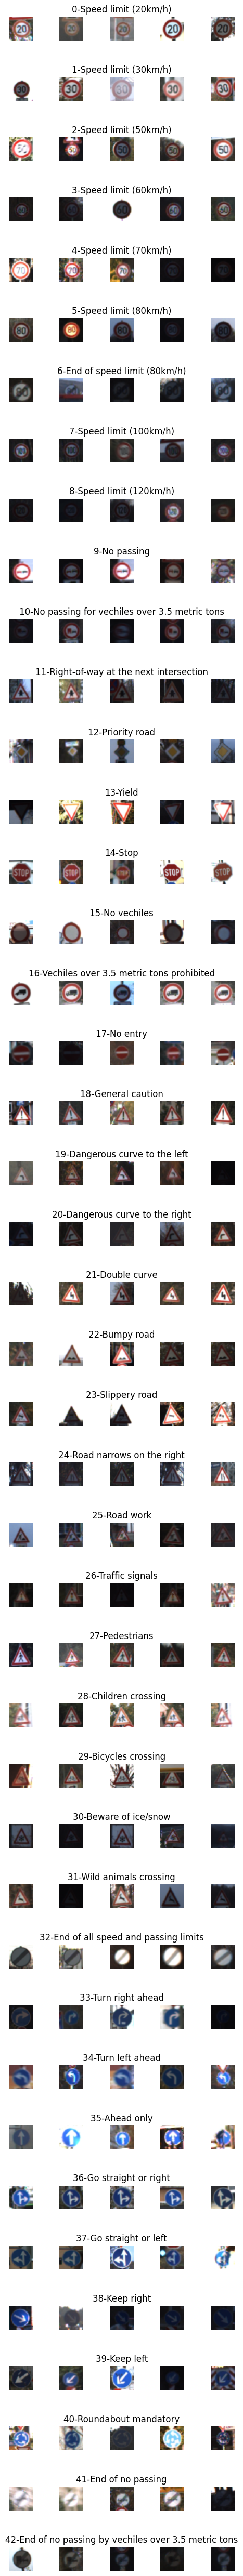

In [11]:
n_samples = []
cols = 5
n_classes = 43

fig, axis = plt.subplots(nrows=n_classes,ncols = cols, figsize=(5,50))
fig.tight_layout()

for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axis[j][i].imshow(x_selected[random.randint(0, len(x_selected) - 1),:, :], cmap=plt.get_cmap("gray"))
        axis[j][i].axis('off')
        if i ==2:
            axis[j][i].set_title(str(j)+"-"+row['SignName'])
            n_samples.append(len(x_selected))

10. Ploting distribution of the dataset

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'number of images')

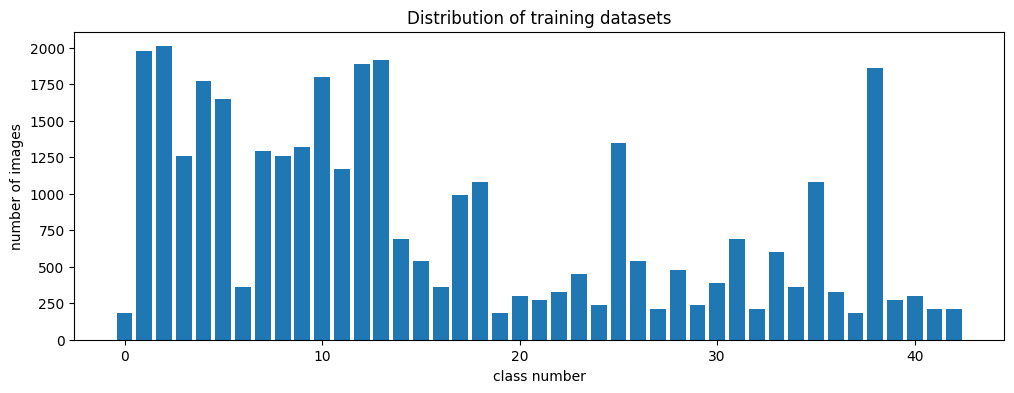

In [12]:
print(n_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,n_classes), n_samples)
plt.title("Distribution of training datasets")
plt.xlabel('class number')
plt.ylabel('number of images')

(34799, 32, 32, 3)
36


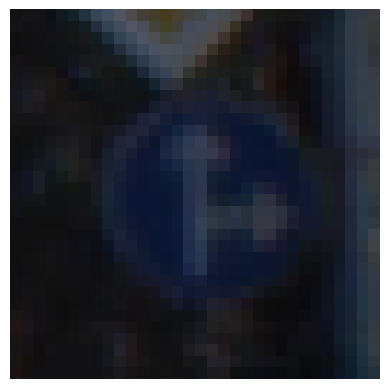

In [13]:
# Checking dimension of the image and plotting
import cv2
plt.imshow(X_train[1000])
plt.axis('off')
print(X_train.shape)
print(y_train[1000])

11. Preprocessing all images
> - Gray Scaling
> - Histogram Equalization



In [14]:
def process_img(X_train, X_test, X_val):

  # Reducing dimension of the image using gray scaling for better computation
  image = gray_scale(X_train[1000])
  plt.figure()
  plt.axis('off')
  plt.title('Processed image after gray scaling')
  plt.imshow(image)
  print("gray scale img shape:", image.shape)

  # histogram equalization - higher intensities at specific region, flatten the intensity value at all regions, intensifies the image
  image = hist_equal(image)
  plt.figure()
  plt.title('Processed image after histogram equalization')
  plt.imshow(image)
  plt.axis('off')
  print("histogram equilize img shape:", image.shape)


  X_train = np.array(list(map(preprocessing, X_train)))
  X_val = np.array(list(map(preprocessing, X_val)))
  X_test = np.array(list(map(preprocessing, X_test)))

  return X_train, X_test, X_val


gray scale img shape: (32, 32)
histogram equilize img shape: (32, 32)


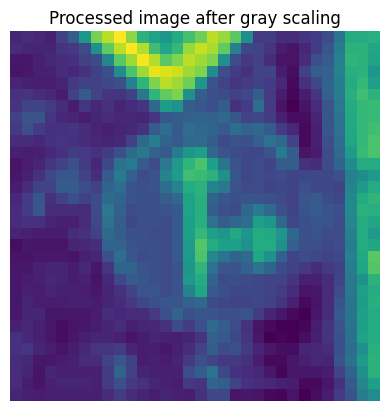

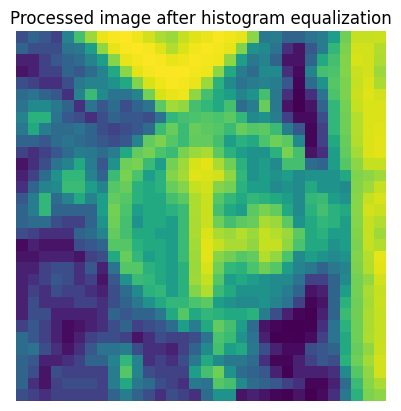

In [15]:
X_train, X_test, X_val = process_img(X_train, X_test, X_val)

12. Reshaping dimension of images for input to model


In [16]:
X_train = X_train.reshape((34799, 32, 32, 1))
X_test = X_test.reshape((12630, 32, 32, 1))
X_val = X_val.reshape((4410, 32, 32, 1))

print("\n","Train features shape: ", X_train.shape, "\n", "Test features shape: ", X_test.shape, "\n", "Valid features shape: ", X_val.shape, "\n","Train lables shape: ", y_train.shape, "\n","Test lables shape: ",y_test.shape, "\n","Valid lables shape: ", y_val.shape)



 Train features shape:  (34799, 32, 32, 1) 
 Test features shape:  (12630, 32, 32, 1) 
 Valid features shape:  (4410, 32, 32, 1) 
 Train lables shape:  (34799,) 
 Test lables shape:  (12630,) 
 Valid lables shape:  (4410,)


13. Defining data augmentation parameters

In [18]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.)

datagen.fit(X_train)

14. Using data augmentation for training data

(20, 32, 32, 1)


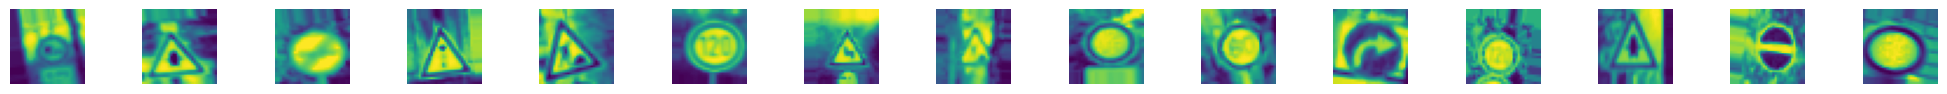

In [19]:
batches = datagen.flow(X_train, y_train, batch_size = 20)
x_batch, y_batch = next(batches)

fig, axis = plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()

for i in range(15):
  axis[i].imshow(x_batch[i].reshape(32,32))
  axis[i].axis('off')
print(x_batch.shape)

15. Using one hot encoding for each label class in train, test and validation dataset

In [20]:
# Representing the data in meaning ful way and preventing it from making incorrect assumptions about ordinality or magnitude within the categories.
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

16. Model Summary

In [21]:
model = modified_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 60)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 30)          0         
 g2D)                                                   

17. Training CNN model

In [ ]:
# h = model.fit(X_train, y_train,
#               validation_data=(X_val,y_val),
#               epochs = 10, batch_size = 400,
#               verbose = 1,
#               shuffle = 1)

In [ ]:
# at least steps_per_epoch * epochs batches
# steps_per_epoch = len(X_train)//batch_size

In [ ]:
batch_size = 50
h = model.fit(datagen.flow(X_train, y_train, batch_size = 50),
                        steps_per_epoch = len(X_train)//batch_size,
                        epochs = 10,
                        validation_data=(X_val,y_val),
                        shuffle = 1)

Epoch 1/10
695/695 [==============================] - 17s 24ms/step - loss: 0.3461 - accuracy: 0.8912 - val_loss: 0.1368 - val_accuracy: 0.9655
Epoch 2/10
695/695 [==============================] - 15s 22ms/step - loss: 0.2618 - accuracy: 0.9186 - val_loss: 0.1021 - val_accuracy: 0.9741
Epoch 3/10
695/695 [==============================] - 15s 22ms/step - loss: 0.2083 - accuracy: 0.9350 - val_loss: 0.1000 - val_accuracy: 0.9773
Epoch 4/10
695/695 [==============================] - 15s 22ms/step - loss: 0.1861 - accuracy: 0.9417 - val_loss: 0.0745 - val_accuracy: 0.9816
Epoch 5/10
695/695 [==============================] - 22s 31ms/step - loss: 0.1697 - accuracy: 0.9472 - val_loss: 0.0929 - val_accuracy: 0.9821
Epoch 6/10
695/695 [==============================] - 15s 22ms/step - loss: 0.1399 - accuracy: 0.9568 - val_loss: 0.0448 - val_accuracy: 0.9878
Epoch 7/10
695/695 [==============================] - 15s 22ms/step - loss: 0.1264 - accuracy: 0.9606 - val_loss: 0.0801 - val_accuracy:

18. Plotting training and validation loss

Text(0.5, 0, 'epoch')

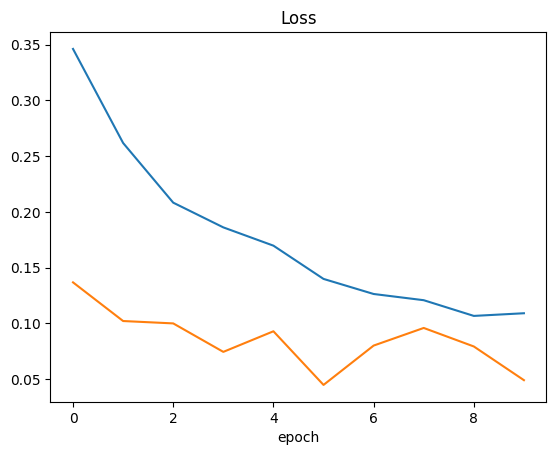

In [ ]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')


19. Plotting training and validation Accuracy

Text(0.5, 0, 'epoch')

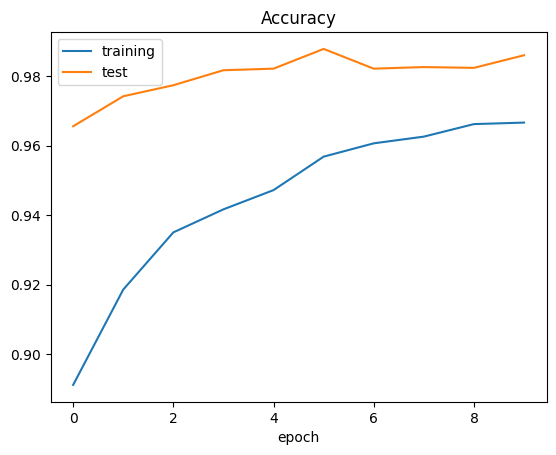

In [ ]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['training','test'])
plt.title('Accuracy')
plt.xlabel('epoch')


20. Evaluating Test Accuracy

In [ ]:
score = model.evaluate(X_test,y_test, verbose = 0)
print(type(score))
print("Test score", score[0], "Test accuracy", score[1])

<class 'list'>
Test score 0.1192341148853302 Test accuracy 0.9714964628219604


21. Checking accuracy on random traffic sign images

> Reference Images Link:

> > 1. https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg

> > 2. https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg

> > 3. https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg

> > 4. https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg

> > 5. https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg

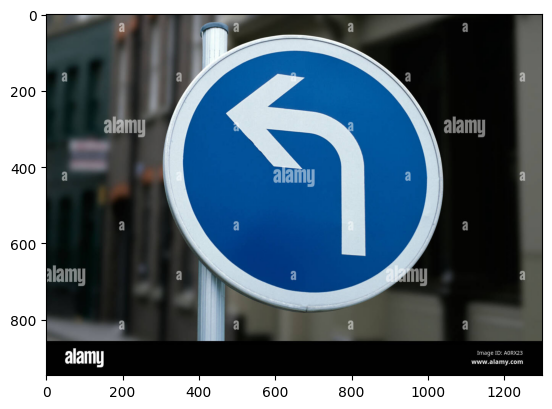

In [ ]:
#loading Images
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


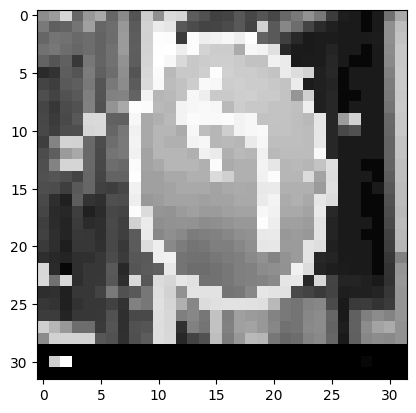

In [ ]:
#Preprocess image

img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [ ]:
#Reshape reshape

img = img.reshape(1, 32, 32, 1)

In [ ]:
#Test image
print("predicted sign: "+ str(np.argmax(model.predict(img), axis=1)))

1/1 [==============================] - 0s 19ms/step
predicted sign: [34]
